In [2]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from prophet import Prophet
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
import plotly.graph_objects as go

In [4]:
import hvplot.pandas
from pandas.plotting import scatter_matrix

In [5]:
import panel as pn
import plotly.express as px

pn.extension("plotly")

In [6]:
# Load .env environment variables
load_dotenv()

True

In [7]:
# plt.style.available
plt.style.use("seaborn-whitegrid")

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [9]:
type(alpaca_api_key)
type(alpaca_secret_key)

str

In [10]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [11]:
# Format current date as ISO format
start_date = pd.Timestamp("2018-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-11-25", tz="America/New_York").isoformat()

In [12]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"
tickers = ["AMZN", "TSLA", "SPY"]


In [13]:
# Get current price data for investigating AMZN and SPY
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date, 
    limit=1000
).df

# Display sample data
df_portfolio.head()

AMZN                                      \
                              open     high      low    close   volume   
time                                                                     
2018-07-02 00:00:00-04:00  1682.70  1713.89  1678.06  1713.75  1844773   
2018-07-03 00:00:00-04:00  1723.96  1725.00  1692.48  1694.88  1224968   
2018-07-05 00:00:00-04:00  1706.05  1710.69  1682.15  1699.56  1756136   
2018-07-06 00:00:00-04:00  1698.01  1715.27  1691.67  1711.01  1379167   
2018-07-09 00:00:00-04:00  1723.76  1739.56  1716.23  1739.03  1575436   

                              SPY                                     \
                             open    high      low   close    volume   
time                                                                   
2018-07-02 00:00:00-04:00  269.51  272.04  269.240  271.94  48149141   
2018-07-03 00:00:00-04:00  272.87  272.98  270.420  270.83  29950023   
2018-07-05 00:00:00-04:00  272.16  273.18  270.960  273.09  41513039   
2018-07-06 00:00:00-04:00  273.14  275.84  272.715  275.37  47009612   
2018-07-09 00:00:00-04:00  276.55  277.96  276.500  277.89  32603309   

                               TSLA                                      
                               open    high     low     close    volume  
time                                                                     
2018-07-02 00:00:00-04:00  360.2800  364.78  329.85  335.0700  14936701  
2018-07-03 00:00:00-04:00  331.9100  332.49  309.69  310.9247   9605990  
2018-07-05 00:00:00-04:00  313.7600  314.39  296.22  309.1100  13989015  
2018-07-06 00:00:00-04:00  304.9545  312.07  302.00  308.9100   7097253  
2018-07-09 00:00:00-04:00  311.8553  318.52  308.00  318.2900   5743049

In [14]:
# View column names
# Use the `columns` attribute to output the column names
df_portfolio.columns

MultiIndex([('AMZN',   'open'),
            ('AMZN',   'high'),
            ('AMZN',    'low'),
            ('AMZN',  'close'),
            ('AMZN', 'volume'),
            ( 'SPY',   'open'),
            ( 'SPY',   'high'),
            ( 'SPY',    'low'),
            ( 'SPY',  'close'),
            ( 'SPY', 'volume'),
            ('TSLA',   'open'),
            ('TSLA',   'high'),
            ('TSLA',    'low'),
            ('TSLA',  'close'),
            ('TSLA', 'volume')],
           )

In [15]:
# Use the `dtypes` attribute to output the column names and data types
df_portfolio.dtypes

AMZN  open      float64
      high      float64
      low       float64
      close     float64
      volume      int64
SPY   open      float64
      high      float64
      low       float64
      close     float64
      volume      int64
TSLA  open      float64
      high      float64
      low       float64
      close     float64
      volume      int64
dtype: object

In [16]:
# Count nulls
df_portfolio.isnull().sum()

AMZN  open      0
      high      0
      low       0
      close     0
      volume    0
SPY   open      0
      high      0
      low       0
      close     0
      volume    0
TSLA  open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

In [17]:
# Use the `duplicated` function to determine the existance of duplicate rows: True or False
df_portfolio.duplicated()

time
2018-07-02 00:00:00-04:00    False
2018-07-03 00:00:00-04:00    False
2018-07-05 00:00:00-04:00    False
2018-07-06 00:00:00-04:00    False
2018-07-09 00:00:00-04:00    False
                             ...  
2021-11-18 00:00:00-05:00    False
2021-11-19 00:00:00-05:00    False
2021-11-22 00:00:00-05:00    False
2021-11-23 00:00:00-05:00    False
2021-11-24 00:00:00-05:00    False
Length: 858, dtype: bool

In [18]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"
ticker_1 = ["AMZN"]

In [19]:
# Get current price data for investigating stock 1: AMZN
df_AMZN = alpaca.get_barset(
    ticker_1,
    timeframe,
    start = start_date,
    end = end_date, 
    limit=1000
).df

# Display sample data
df_AMZN.head()

AMZN                                    
                              open     high      low    close   volume
time                                                                  
2018-07-02 00:00:00-04:00  1682.70  1713.89  1678.06  1713.75  1844773
2018-07-03 00:00:00-04:00  1723.96  1725.00  1692.48  1694.88  1224968
2018-07-05 00:00:00-04:00  1706.05  1710.69  1682.15  1699.56  1756136
2018-07-06 00:00:00-04:00  1698.01  1715.27  1691.67  1711.01  1379167
2018-07-09 00:00:00-04:00  1723.76  1739.56  1716.23  1739.03  1575436

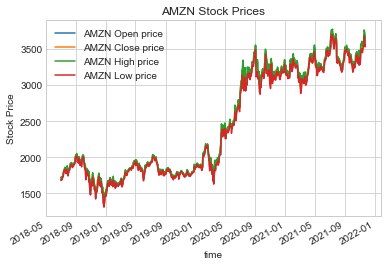

<Figure size 1600x8000 with 0 Axes>

In [20]:
# Plot AMZN
df_AMZN['AMZN']['open']. plot(label = 'AMZN Open price')
df_AMZN['AMZN']['close']. plot(label = 'AMZN Close price')
df_AMZN['AMZN']['high']. plot(label = 'AMZN High price')
df_AMZN['AMZN']['low']. plot(label = 'AMZN Low price')
plt.legend()
plt.title('AMZN Stock Prices')
plt.ylabel('Stock Price')
plt.figure(figsize=(20, 100), dpi=80)
plt.show()

In [21]:
# Create and empty DataFrame for closing prices of AMZN
df_AMZN_volume = pd.DataFrame()

# Fetch the closing prices of AMZN 
df_AMZN_volume["AMZN"] = df_portfolio["AMZN"]["volume"]

# Drop the time component of the date
df_AMZN_volume.index = df_AMZN_volume.index.date

# Display sample data
df_AMZN_volume.head()

AMZN
2018-07-02  1844773
2018-07-03  1224968
2018-07-05  1756136
2018-07-06  1379167
2018-07-09  1575436

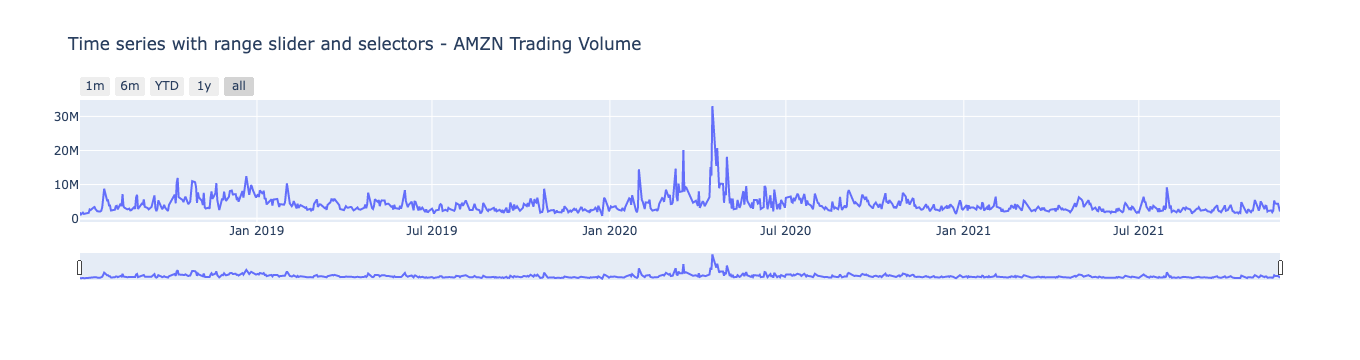

In [22]:
# Plot time Series with Range Slider button
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(df_AMZN_volume.index), y=list(df_AMZN_volume.AMZN)))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors - AMZN Trading Volume"
)
# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [23]:
# Create and empty DataFrame for closing prices of AMZN
df_AMZN_closing_prices = pd.DataFrame()

# Fetch the closing prices of AMZN 
df_AMZN_closing_prices["AMZN"] = df_portfolio["AMZN"]["close"]

# Drop the time component of the date
df_AMZN_closing_prices.index = df_AMZN_closing_prices.index.date

# Display sample data
df_AMZN_closing_prices.head()

AMZN
2018-07-02  1713.75
2018-07-03  1694.88
2018-07-05  1699.56
2018-07-06  1711.01
2018-07-09  1739.03

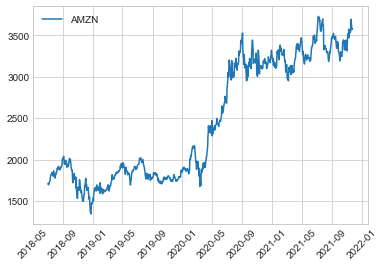

In [24]:
# Plot the Closing Prices of Amazon 
df_AMZN_closing_prices.plot()
plt.xticks(rotation = 45)
# Rotates x-axis Ticks by 45-degrees
plt.show()

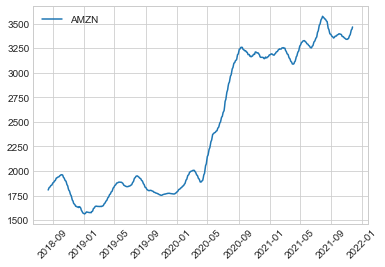

In [25]:
# Rolling Statistics 30-Day Mean of Amazon Closing Prices
df_AMZN_closing_prices.rolling(window=30).mean().plot()
plt.xticks(rotation = 45)
# Rotates x-axis Ticks by 45-degrees
plt.show()

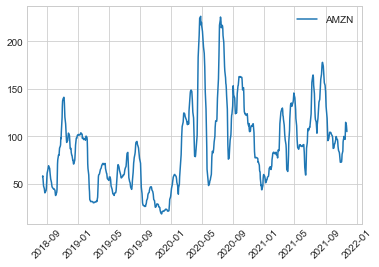

In [26]:
# Rolling Statistics 30-Day Standard Deviation of AMZN Closing Prices
df_AMZN_closing_prices.rolling(window=30).std().plot()
plt.xticks(rotation = 45) 
# Rotates x-axis Ticks by 45-degrees
plt.show()

In [27]:
# Plot closing prices
df_AMZN_closing_prices.hvplot.line(
    xlabel="Date",
    ylabel="Stock Price"
)

:Curve   [index]   (AMZN)

In [28]:
# Calculate the summary statistics of key points of AMZN
df_AMZN_summary = df_AMZN.describe()
df_AMZN_summary

AMZN                                                     
              open         high          low        close        volume
count   858.000000   858.000000   858.000000   858.000000  8.580000e+02
mean   2459.052999  2485.637517  2430.162800  2458.265266  4.104846e+06
std     722.373130   729.735726   714.278191   721.367683  2.565630e+06
min    1346.000000  1396.030000  1307.000000  1342.910000  8.007380e+05
25%    1801.275000  1820.515000  1785.407500  1801.775000  2.623822e+06
50%    2026.020000  2042.190000  2003.735000  2015.800000  3.429788e+06
75%    3210.945000  3247.430000  3174.557500  3206.287500  4.838134e+06
max    3743.500000  3773.078100  3696.793000  3731.420000  3.302451e+07

In [29]:
# Compute daily returns for AMZN
df_daily_returns_AMZN = df_AMZN_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns_AMZN.head()

AMZN
2018-07-03 -0.011011
2018-07-05  0.002761
2018-07-06  0.006737
2018-07-09  0.016376
2018-07-10  0.002484

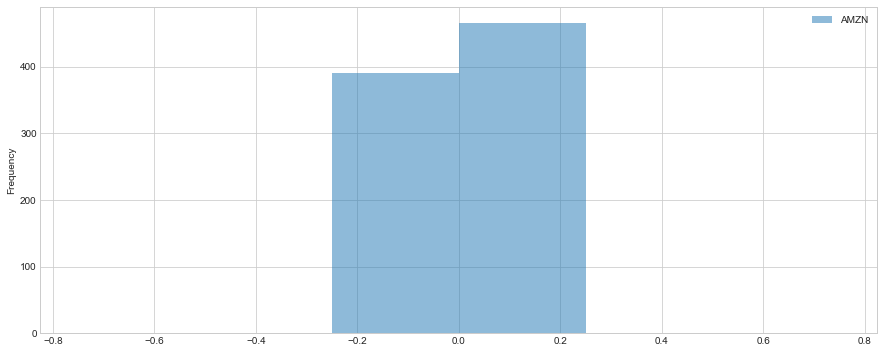

In [30]:
# Visualize the distribution of daily returns across AMZN using a histogram plot
# Hint: To make the plot easier to read, set the alpha arguement to 0.5
df_daily_returns_AMZN.plot.hist(alpha=0.5,bins=[-0.75,-0.5,-0.25,0,0.25,0.5,0.75], figsize = (15,6))

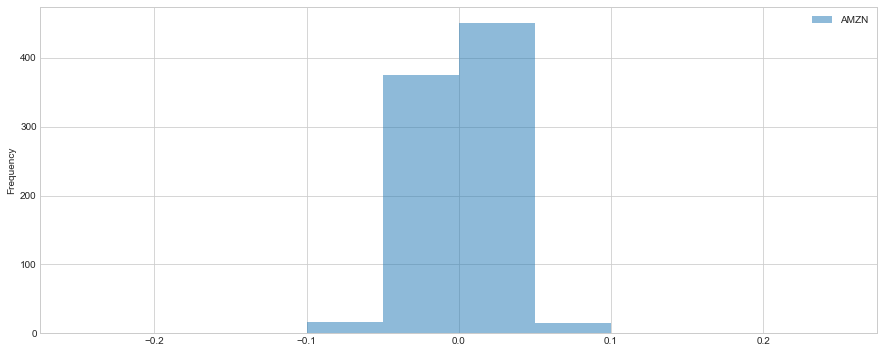

In [31]:
df_daily_returns_AMZN.plot.hist(alpha=0.5,bins=[-0.25,-0.20,-0.15,-0.10,-0.05,0,0.05,0.10,0.15,0.20,0.25], figsize = (15,6))

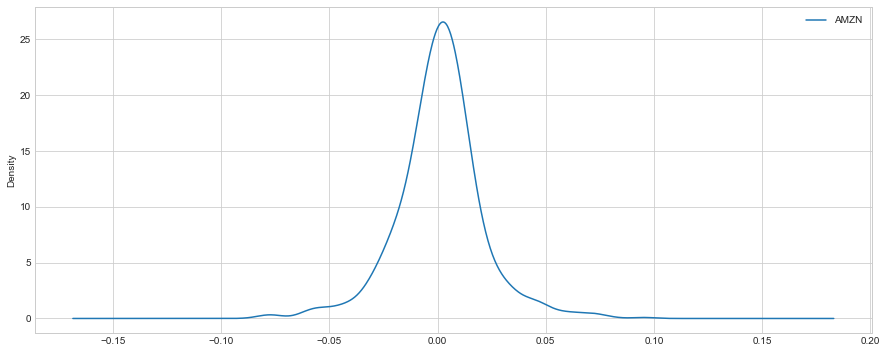

In [32]:
# Visualize the distribution of daily returns across AMZN using a density plot
df_daily_returns_AMZN.plot.density(figsize = (15,6))

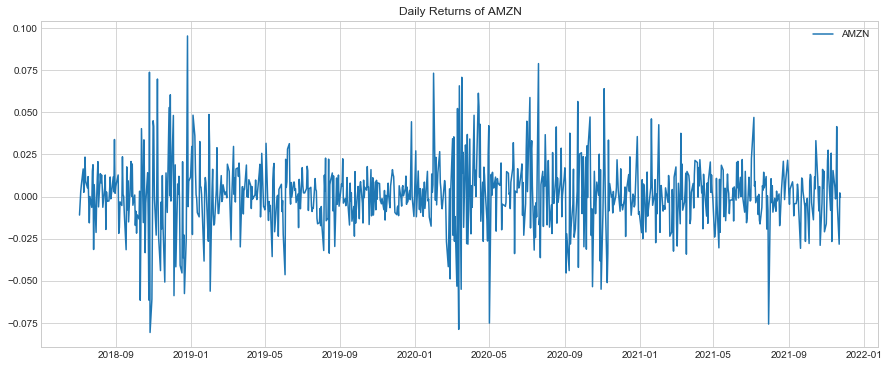

In [33]:
df_daily_returns_AMZN.plot(title = "Daily Returns of AMZN", figsize = (15,6))

In [34]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"
ticker_2 = ["TSLA"]

In [35]:
# Get current price data for investigating stock 2: TSLA
df_TSLA = alpaca.get_barset(
    ticker_2,
    timeframe,
    start = start_date,
    end = end_date, 
    limit=1000
).df

# Display sample data
df_TSLA.head()

TSLA                                    
                               open    high     low     close    volume
time                                                                   
2018-07-02 00:00:00-04:00  360.2800  364.78  329.85  335.0700  14936701
2018-07-03 00:00:00-04:00  331.9100  332.49  309.69  310.9247   9605990
2018-07-05 00:00:00-04:00  313.7600  314.39  296.22  309.1100  13989015
2018-07-06 00:00:00-04:00  304.9545  312.07  302.00  308.9100   7097253
2018-07-09 00:00:00-04:00  311.8553  318.52  308.00  318.2900   5743049

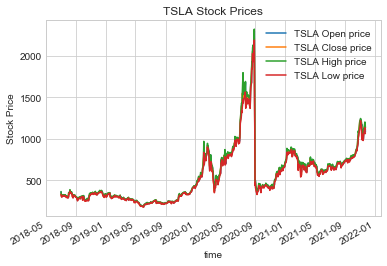

<Figure size 1600x8000 with 0 Axes>

In [36]:
# Plot TSLA
df_TSLA['TSLA']['open']. plot(label = 'TSLA Open price')
df_TSLA['TSLA']['close']. plot(label = 'TSLA Close price')
df_TSLA['TSLA']['high']. plot(label = 'TSLA High price')
df_TSLA['TSLA']['low']. plot(label = 'TSLA Low price')
plt.legend()
plt.title('TSLA Stock Prices')
plt.ylabel('Stock Price')
plt.figure(figsize=(20, 100), dpi=80)
plt.show()

In [37]:
# Use the `drop` function to delete the newly created `volume` column
df_TSLA = df_TSLA.drop(('TSLA', 'volume'), axis = 1)
df_TSLA.head()

TSLA                          
                               open    high     low     close
time                                                         
2018-07-02 00:00:00-04:00  360.2800  364.78  329.85  335.0700
2018-07-03 00:00:00-04:00  331.9100  332.49  309.69  310.9247
2018-07-05 00:00:00-04:00  313.7600  314.39  296.22  309.1100
2018-07-06 00:00:00-04:00  304.9545  312.07  302.00  308.9100
2018-07-09 00:00:00-04:00  311.8553  318.52  308.00  318.2900

In [38]:
df_TSLA.columns

MultiIndex([('TSLA',  'open'),
            ('TSLA',  'high'),
            ('TSLA',   'low'),
            ('TSLA', 'close')],
           )

In [39]:
# Create and empty DataFrame for closing prices
df_TSLA_closing_prices = pd.DataFrame()

# Fetch the closing prices of SPY
df_TSLA_closing_prices["TSLA"] = df_portfolio["TSLA"]["close"]

# Drop the time component of the date
df_TSLA_closing_prices.index = df_TSLA_closing_prices.index.date

# Display sample data
df_TSLA_closing_prices.head()

TSLA
2018-07-02  335.0700
2018-07-03  310.9247
2018-07-05  309.1100
2018-07-06  308.9100
2018-07-09  318.2900

In [40]:
# Create and empty DataFrame for closing prices of TSLA
df_TSLA_volume = pd.DataFrame()

# Fetch the closing prices of AMZN 
df_TSLA_volume["TSLA"] = df_portfolio["TSLA"]["volume"]

# Drop the time component of the date
df_TSLA_volume.index = df_TSLA_volume.index.date

# Display sample data
df_TSLA_volume.head()

TSLA
2018-07-02  14936701
2018-07-03   9605990
2018-07-05  13989015
2018-07-06   7097253
2018-07-09   5743049

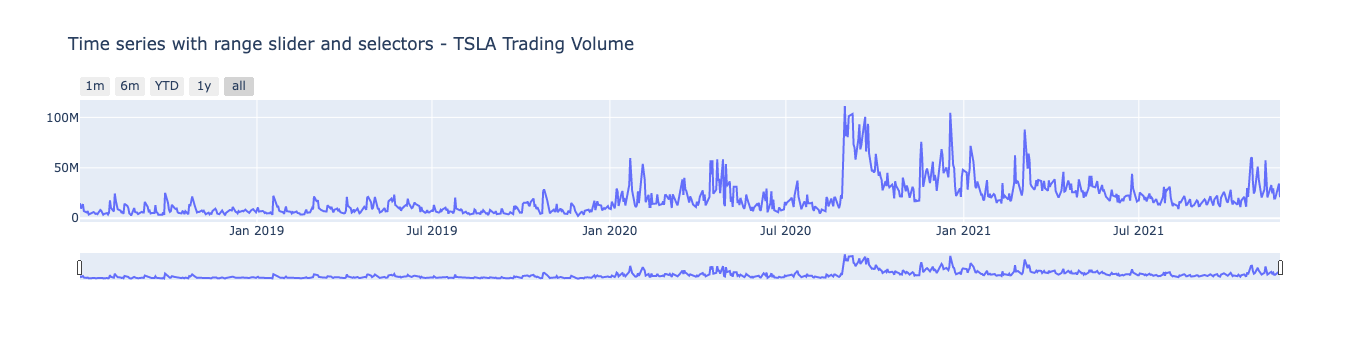

In [41]:
# Plot time Series with Range Slider button
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(df_TSLA_volume.index), y=list(df_TSLA_volume.TSLA)))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors - TSLA Trading Volume"
)
# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [42]:
# Create and empty DataFrame for closing prices of TSLA
df_TSLA_closing_prices = pd.DataFrame()

# Fetch the closing prices of AMZN 
df_TSLA_closing_prices["TSLA"] = df_portfolio["TSLA"]["close"]

# Drop the time component of the date
df_TSLA_closing_prices.index = df_TSLA_closing_prices.index.date

# Display sample data
df_TSLA_closing_prices.head()

TSLA
2018-07-02  335.0700
2018-07-03  310.9247
2018-07-05  309.1100
2018-07-06  308.9100
2018-07-09  318.2900

In [43]:
# Plot closing prices
df_TSLA_closing_prices.hvplot.line(
    xlabel="Date",
    ylabel="Stock Price"
)

:Curve   [index]   (TSLA)

In [44]:
# Compute daily returns for AMZN
df_daily_returns_TSLA = df_TSLA_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns_TSLA.head()

TSLA
2018-07-03 -0.072060
2018-07-05 -0.005836
2018-07-06 -0.000647
2018-07-09  0.030365
2018-07-10  0.012818

In [45]:
# Calculate the summary statistics of key points of TSLA
df_TSLA_summary = df_TSLA.describe()
df_TSLA_summary

TSLA                                       
              open         high          low        close
count   858.000000   858.000000   858.000000   858.000000
mean    557.096176   570.487487   543.669416   557.932035
std     338.472178   349.222650   328.474678   339.773728
min     181.100000   186.680000   176.991900   179.010000
25%     301.690000   306.860000   295.231350   300.937500
50%     441.380000   453.250000   429.785000   441.665000
75%     719.265000   740.937500   704.900000   728.300000
max    2295.120000  2318.490000  2186.520000  2239.760000

In [46]:
# Create and empty DataFrame for closing prices
df_SPY_closing_prices = pd.DataFrame()

# Fetch the closing prices of SPY
df_SPY_closing_prices["SPY"] = df_portfolio["SPY"]["close"]

# Drop the time component of the date
df_SPY_closing_prices.index = df_SPY_closing_prices.index.date

# Display sample data
df_SPY_closing_prices.head()

SPY
2018-07-02  271.94
2018-07-03  270.83
2018-07-05  273.09
2018-07-06  275.37
2018-07-09  277.89

In [47]:
# Compute daily returns for SPY
df_daily_returns_SPY = df_SPY_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns_SPY.head()

SPY
2018-07-03 -0.004082
2018-07-05  0.008345
2018-07-06  0.008349
2018-07-09  0.009151
2018-07-10  0.003347

In [48]:
# Join AMZN & SPY  daily returns into a single DataFrame with columns for each stocks daily returns.
combined_daily_returns = pd.concat([df_daily_returns_AMZN, df_daily_returns_TSLA, df_daily_returns_SPY], axis = "columns", join = "inner")
combined_daily_returns = combined_daily_returns.dropna()
combined_daily_returns

AMZN      TSLA       SPY
2018-07-03 -0.011011 -0.072060 -0.004082
2018-07-05  0.002761 -0.005836  0.008345
2018-07-06  0.006737 -0.000647  0.008349
2018-07-09  0.016376  0.030365  0.009151
2018-07-10  0.002484  0.012818  0.003347
...              ...       ...       ...
2021-11-18  0.041481  0.006398  0.003418
2021-11-19 -0.005208  0.037168 -0.001703
2021-11-22 -0.028283  0.016647 -0.002943
2021-11-23  0.002164 -0.040863  0.001540
2021-11-24 -0.000413  0.006349  0.002392

[857 rows x 3 columns]

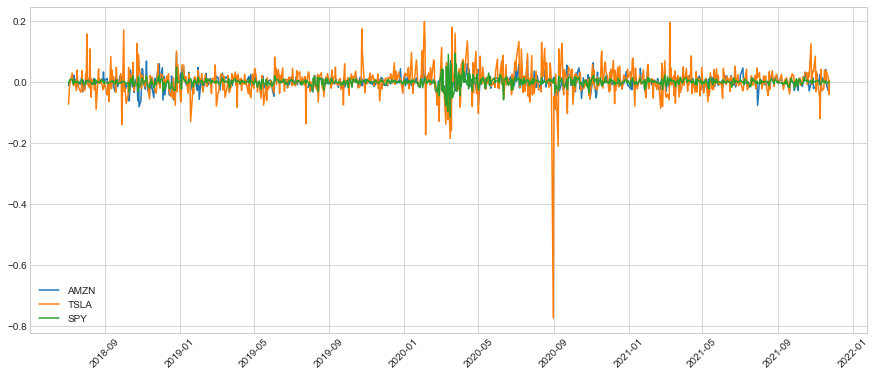

In [49]:
# Plot Daily Returns of the combined stocks
combined_daily_returns.plot(figsize = (15,6))
plt.xticks(rotation = 45)
# Rotates x-axis Ticks by 45-degrees
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e6109ad90>,
      dtype=object)

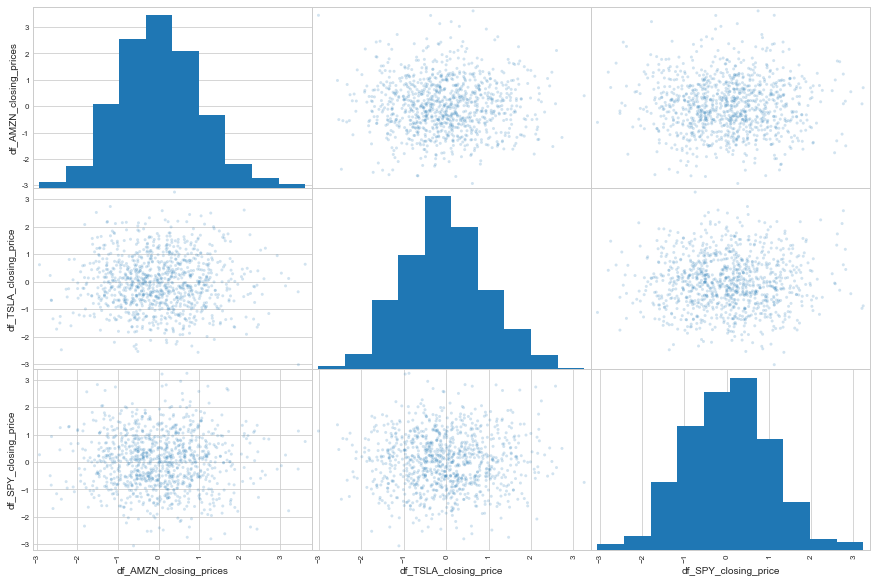

In [50]:
# Plot Panel dashboard
df_combined_closing = pd.DataFrame(np.random.randn(1000, 3), columns=['df_AMZN_closing_prices','df_TSLA_closing_price','df_SPY_closing_price'])
pd.plotting.scatter_matrix(df_combined_closing, alpha=0.2, figsize=(15, 10))

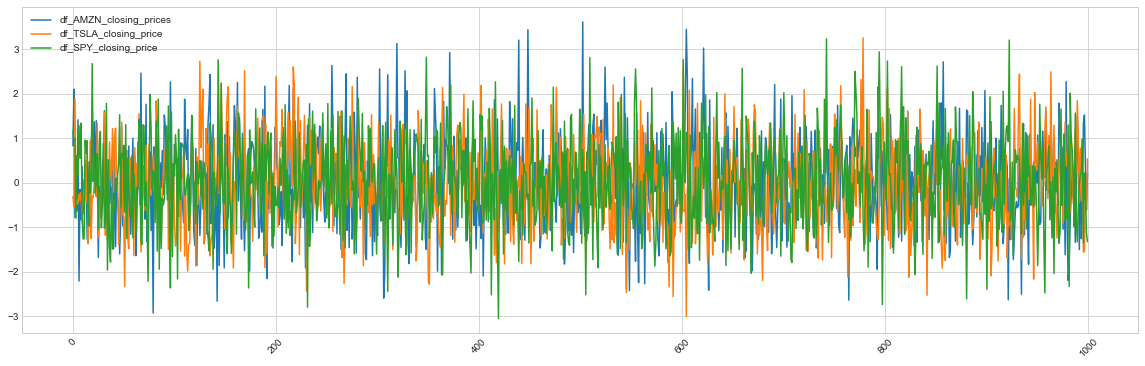

In [51]:
# Plot Closing Prices of the combined stocks
df_combined_closing.plot(figsize = (20,6))
plt.xticks(rotation = 45)
# Rotates x-axis Ticks by 45-degrees
plt.show()

In [54]:
#df_closing_prices.rename(columns={'AMZN': 'y', 'date': 'ds'}, inplace=True)
#df_closing_prices = df_closing_prices.rename(columns={"date": "ds", "y": "y"})
#df_closing_prices = df_closing_prices.rename(index={0: "ds"})
df_SPY_closing_prices.index.name = 'date'
amzn_price = df_SPY_closing_prices.reset_index()


#df_closing_prices = df_closing_prices.reset_index()
amzn_price = amzn_price.rename(columns={"date": "ds", "SPY": "y"})

amzn_price.head()


ds       y
0  2018-07-02  271.94
1  2018-07-03  270.83
2  2018-07-05  273.09
3  2018-07-06  275.37
4  2018-07-09  277.89

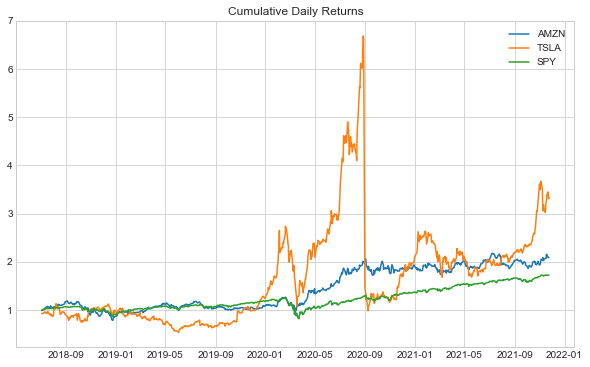

In [55]:
# Calculate cumulative returns
cumulative_return = (1 + combined_daily_returns).cumprod()

# Plot cumulative returns
cumulative_return.plot(title='Cumulative Daily Returns', figsize = (10,6))

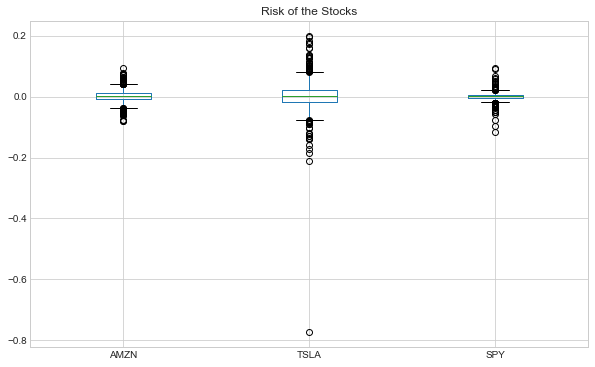

In [56]:
# Box plot to visually show risk
combined_daily_returns.plot(kind = "box", title = 'Risk of the Stocks', figsize = (10,6))

In [57]:
# Calculate the daily standard deviations of all portfolios
combined_daily_returns = combined_daily_returns.std().sort_values(ascending=True)
combined_daily_returns

SPY     0.013740
AMZN    0.020126
TSLA    0.049898
dtype: float64

In [58]:
# Calculate the daily return summary statistics
combined_daily_returns = combined_daily_returns.describe()
combined_daily_returns


count    3.000000
mean     0.027921
std      0.019298
min      0.013740
25%      0.016933
50%      0.020126
75%      0.035012
max      0.049898
dtype: float64

In [59]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = combined_daily_returns * np.sqrt(252)
df_annualized_std

count    47.623524
mean      0.443239
std       0.306352
min       0.218122
25%       0.268804
50%       0.319486
75%       0.555797
max       0.792109
dtype: float64

In [60]:
# Calculate the rolling Mean for the combined stocks using a 21-day window
stock1_rolling_mean_21days = df_daily_returns_AMZN.rolling(window = 21).mean().dropna()
stock2_rolling_mean_21days = df_daily_returns_TSLA.rolling(window = 21).mean().dropna()
stock3_rolling_mean_21days = df_daily_returns_SPY.rolling(window = 21).mean().dropna()
combined_stocks_rolling_mean_21days = pd.concat([stock1_rolling_mean_21days, stock2_rolling_mean_21days, stock3_rolling_mean_21days], axis = "columns", join = "inner")
combined_stocks_rolling_mean_21days.head()

AMZN      TSLA       SPY
2018-08-01  0.002350 -0.004672  0.001562
2018-08-02  0.003859  0.006325  0.001997
2018-08-03  0.003435  0.006454  0.001819
2018-08-06  0.003761  0.005624  0.001596
2018-08-07  0.003368  0.009410  0.001304

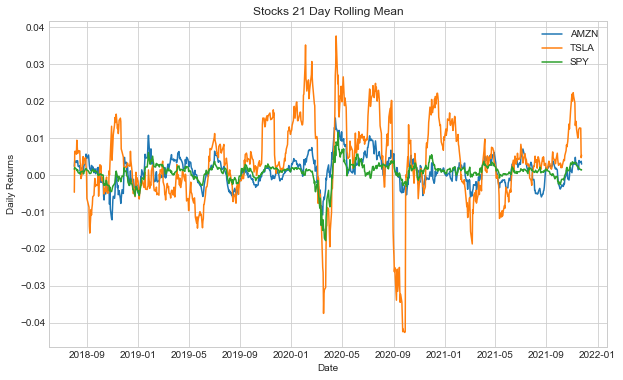

In [61]:
combined_stocks_rolling_mean_21days.plot(title="Stocks 21 Day Rolling Mean", xlabel=("Date"), ylabel=("Daily Returns"),figsize = (10,6))

In [62]:
# Calculate the rolling standard deviation for the stock using a 21-day window
combined_stocks_rolling_std_21days = combined_daily_returns.rolling(window = 21).std().dropna()
combined_stocks_rolling_std_21days

Series([], dtype: float64)

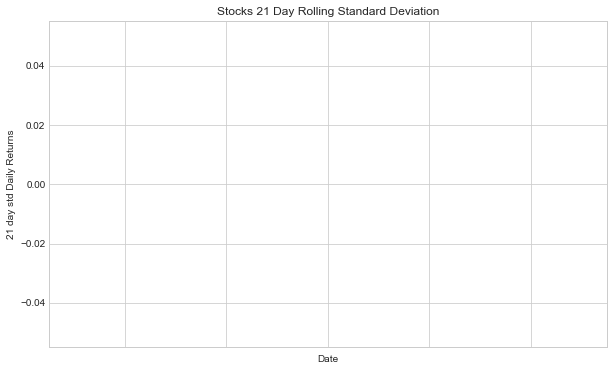

In [63]:
combined_stocks_rolling_std_21days.plot(title="Stocks 21 Day Rolling Standard Deviation", xlabel=("Date"), ylabel=("21 day std Daily Returns"), figsize = (10,6))

In [64]:
# Calculate cumulative returns of compared stocks
#combined_cumulative_returns = (1 + combined_daily_returns).cumprod()

# Plot cumulative returns
#combined_cumulative_returns.plot(title='Dual stock comparision of Cumulative Returns', figsize = (10,6))

In [65]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_daily_returns.mean() * 252) / (combined_daily_returns.std() * np.sqrt(252))
sharpe_ratio

6.006666219694568

# AMAZON PROPHET FORECAST ANALYSIS STARTS

In [73]:
df_SPY_closing_prices.index.name = 'date'
amzn_price = df_SPY_closing_prices.reset_index()
#df_closing_prices.rename(columns={'AMZN': 'y', 'date': 'ds'}, inplace=True)
#df_closing_prices = df_closing_prices.rename(columns={"date": "ds", "y": "y"})
#df_closing_prices = df_closing_prices.rename(index={0: "ds"})

#df_closing_prices = df_closing_prices.reset_index()
amzn_price = amzn_price.rename(columns={"date": "ds", "SPY": "y"})

amzn_price.head()


ds       y
0  2018-07-02  271.94
1  2018-07-03  270.83
2  2018-07-05  273.09
3  2018-07-06  275.37
4  2018-07-09  277.89

In [74]:
m = Prophet()

m.fit(amzn_price)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [75]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
1218 2022-11-20  576.543815  421.206824  736.619239
1219 2022-11-21  578.749874  422.923849  737.152184
1220 2022-11-22  579.688821  422.372430  739.743265
1221 2022-11-23  580.078150  419.939755  743.691177
1222 2022-11-24  580.630942  422.173838  744.789027

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each ax

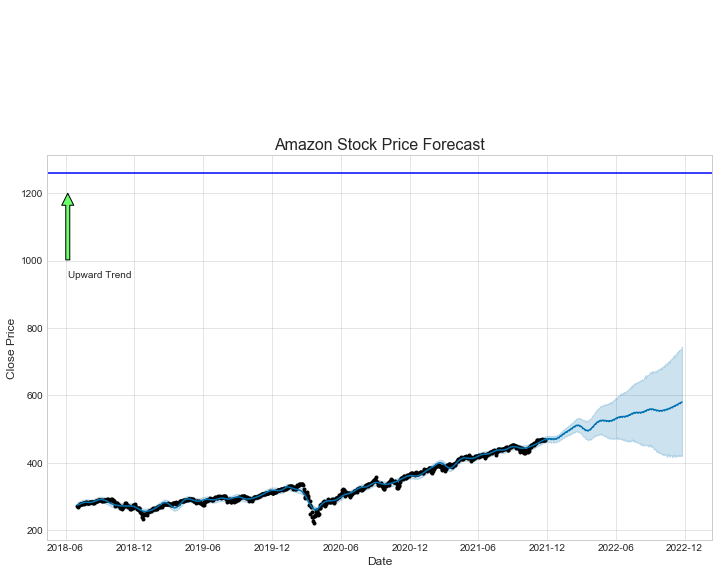

In [76]:
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2018, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Amazon Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1350), xytext=(starting_date1,1700),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 1225), xytext=(trend_date1,950),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=1260, color='b', linestyle='-')

plt.show()

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning:

Su

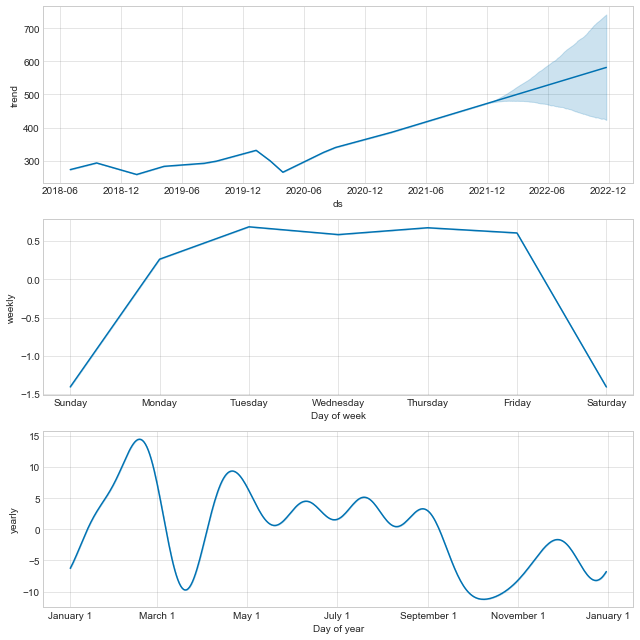

In [77]:
fig2 = m.plot_components(forecast)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



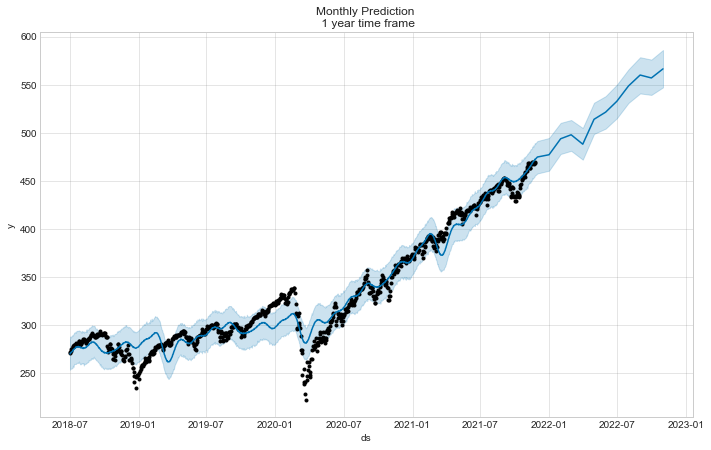

In [78]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(amzn_price)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/Users/jkaryampudi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning:

Su

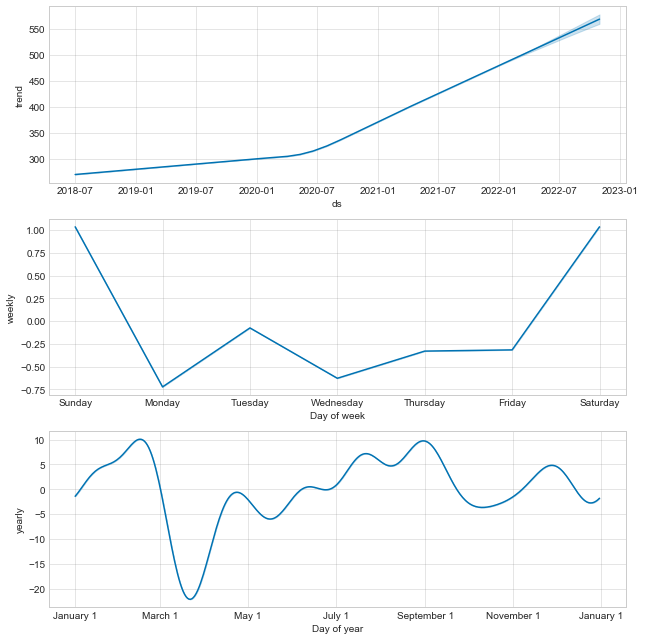

In [79]:
fig = m.plot_components(fcst)
plt.show()